In [70]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.pyplot import figure

%matplotlib inline
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

palette = [ '#0085C7',"#FFCE54", '#000000','#00BFC4','#F8766D','#A1469E']
sns.set_palette(palette)

In [71]:
movies = pd.read_csv(r'N:\IBA\6th Sem\Business Analytics\Project\Individual Project\IMDB Movies\movies.csv')

In [72]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894.0,NaN,Romance,45,USA,None,Alexander Black,...,6.2,97.0,6.0,35.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,12/26/1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.1,425.0,6.2,50.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911.0,8/19/1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.9,146.0,5.7,15.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,Cleopatra,1912.0,11/13/1912,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.1,299.0,5.9,39.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,L'Inferno,1911.0,3/6/1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,1607.0,7.2,215.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [73]:
print(movies.columns)

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'rating', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'males_allages_avg_vote',
       'males_allages_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'top1000_voters_rating',
       'top1000_voters_votes', 'us_voters_rating', 'us_voters_votes',
       'non_us_voters_rating', 'non_us_voters_votes'],
      dtype='object')


In [74]:
# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

percetile_25 = q25(movies['rating'])
percetile_75 = q75(movies['rating'])
mean = movies['rating'].mean()
median = movies['rating'].median()

c:\users\kennw\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


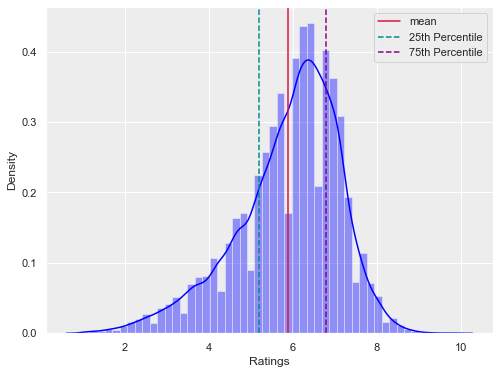

In [75]:
sns.distplot(movies.rating, color = 'blue').set(xlabel= 'Ratings')

plt.axvline(mean, 0,1, color = '#DC143C' , label = 'mean')
plt.axvline(percetile_25, 0,1, color = '#008B8B' , linestyle="--", label = '25th Percentile')
plt.axvline(percetile_75, 0,1, color = '#8B008B', linestyle="--", label = '75th Percentile')

plt.legend(loc='upper right')

plt.savefig('Rating_Variable', dpi = 300)

In [76]:
print(mean)
print(median)
print(percetile_25)
print(percetile_75)

5.8986558732747065
6.1
5.2
6.8


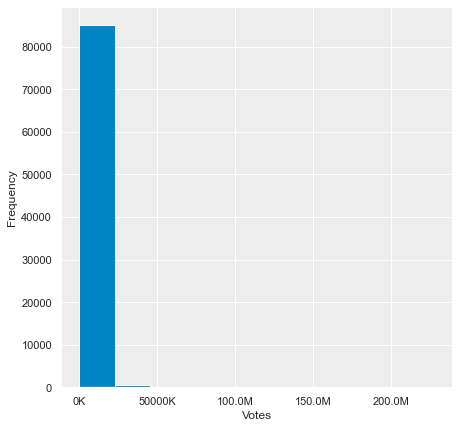

In [77]:
def format_number(data_value, indx):
    if data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.0_001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.1)
    return formatter 

fig, ax = plt.subplots(figsize = (7,7))
plt.hist(movies.votes)
ax.xaxis.set_major_formatter(format_number)

plt.xlabel('Votes')
plt.ylabel('Frequency')

plt.savefig('Votes_Dist_Raw', dpi = 300)

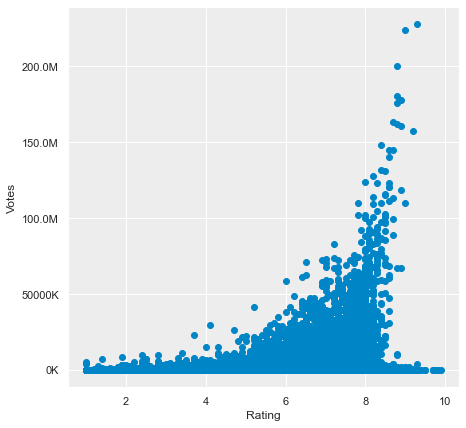

In [78]:
fig, ax = plt.subplots(figsize = (7,7))

plt.scatter(movies.rating, movies.votes)
ax.yaxis.set_major_formatter(format_number)
plt.xlabel('Rating')
plt.ylabel('Votes')


plt.savefig('Rating_vs_Votes', dpi = 300)

In [79]:
movies_2 = movies.copy()
movies_2.dropna(inplace=True)

from collections import defaultdict
all_genres = defaultdict(int)

for genres in movies_2['Genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('Genre_Word_Cloud', dpi = 300)

KeyError: 'Genre'

In [ ]:
dummies = pd.get_dummies(movies['genre'].str.get_dummies(sep=','))

In [ ]:
matrix = np.asmatrix(dummies.corr())
G = nx.from_numpy_matrix(matrix)

In [80]:
def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)

    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')

TypeError: draw_networkx_edges() got an unexpected keyword argument 'edge_list'

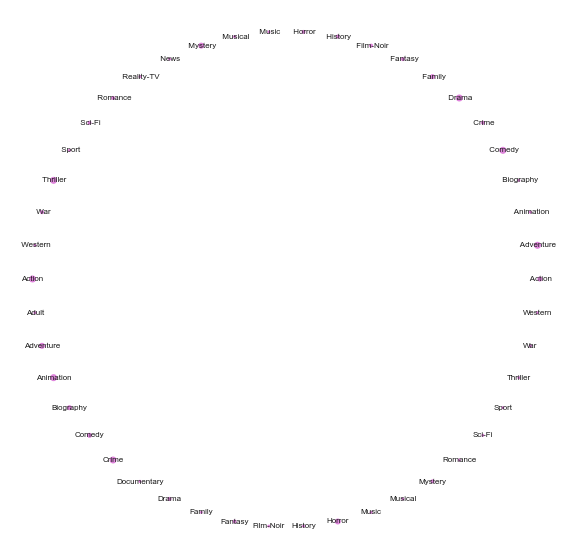

In [82]:
sns.set_style("darkgrid", {"axes.facecolor": "1"})

corr = dummies.corr() 
stocks = corr.index.values 
csr_matrix = np.asmatrix(corr) 
G = nx.from_numpy_matrix(csr_matrix) 
G = nx.relabel_nodes(G,lambda x: stocks[x]) 
G.edges(data=True) 
create_corr_network(G, 'positive', 0.1)

KeyError: 'release_year'

<Figure size 864x720 with 0 Axes>

In [89]:
L = movies.language.groupby(movies.language).count().sort_values(ascending=False).to_frame()
L.head(10)

,language
language,
English,35939
French,3903
Spanish,2831
Japanese,2826
Italian,2731
Hindi,2106
German,1761
Turkish,1355
Russian,1345


In [95]:
movies_country = movies['country'].value_counts().sort_values(ascending=False).to_frame()
top15countries = movies_country.head(15)
top15countries

,country
USA,28511
India,6065
UK,4111
Japan,3077
France,3055
Italy,2444
Canada,1802
Germany,1396
Turkey,1351
Hong Kong,1239
